-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 2D dimensions.
Computational cell is 0.44 x 0.8 x 0 with resolution 500
time for set_epsilon = 0.428009 s
-----------
creating output file "./ez-000001000.h5"...
creating output file "./ez-000002000.h5"...
creating output file "./ez-000003000.h5"...
Meep progress: 3.9050000000000002/50.0 = 7.8% done in 4.0s, 47.2s to go
on time step 3905 (time=3.905), 0.00102447 s/step
creating output file "./ez-000004000.h5"...
creating output file "./ez-000005000.h5"...
creating output file "./ez-000006000.h5"...
creating output file "./ez-000007000.h5"...
creating output file "./ez-000008000.h5"...
creating output file "./ez-000009000.h5"...
Meep progress: 9.369/50.0 = 18.7% done in 8.0s, 34.7s to go
on time step 9384 (time=9.384), 0.000730084 s/step
creating output file "./ez-000010000.h5"...
creating output file "./ez-000011000.h5"...
creating output file "./ez-000012000.h5"...
creating output file "./ez

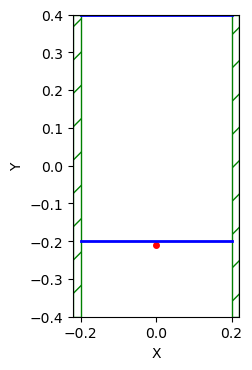

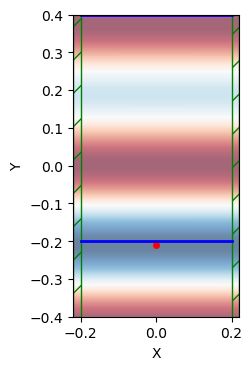

on time step 50000 (time=50), 0.00083867 s/step
Meep progress: 9.201999999999998/100.0 = 9.2% done in 4.0s, 39.5s to go
on time step 59424 (time=59.424), 0.000424465 s/step
Meep progress: 18.575000000000003/100.0 = 18.6% done in 8.0s, 35.1s to go
on time step 68822 (time=68.822), 0.000425648 s/step
Meep progress: 27.331000000000003/100.0 = 27.3% done in 12.0s, 31.9s to go
on time step 77469 (time=77.469), 0.000462614 s/step
Meep progress: 36.083/100.0 = 36.1% done in 16.0s, 28.3s to go
on time step 86376 (time=86.376), 0.000449308 s/step
Meep progress: 46.135000000000005/100.0 = 46.1% done in 20.0s, 23.4s to go
on time step 96440 (time=96.44), 0.000397463 s/step
Normalizing field data...
run 1 finished at t = 100.0 (100000 timesteps)


In [2]:
import meep as mp
import numpy as np
from meep.materials import Ag
import math
import matplotlib.pyplot as plt
import cmath
import random
from IPython.display import HTML 
resolution = 500

dpml = 0.02
pml_layers = [mp.PML(thickness=dpml,direction=mp.X)]

sx = 0.40
sy = 0.80
cell_size = mp.Vector3(sx+2*dpml,sy)


wvth = 0.5
v0 = 1/wvth  # pulse center frequency
a = 0.2   # Gaussian envelope half-width
b = -0.5  # linear chirp rate (positive: up-chirp, negative: down-chirp)
t0 = 15   # peak time

#chirp = lambda t: np.exp(1j*2*np.pi*v0*(t-t0)) * np.exp(-a*(t-t0)**2+1j*b*(t-t0)**2)
#chirp = lambda t: -50*(t%2 - 1)
           
                    
#sources = [mp.Source(src=mp.CustomSource(src_func=chirp),
 #                    center=mp.Vector3(),
  #                   component=mp.Ez)]

#lp = 0.0242 #distance
#sources = []
#for n in range(-8, 8):
 #   for p in range(-16,-8):
  #      z = random.randint(0,100)
   #     chirp = lambda t: np.exp(1j*2*np.pi*v0*(t-t0)) * np.exp(-a*(t-t0)**2+1j*b*(t-t0)**2) * (z/10)
    #    sources.append(mp.Source(src = mp.CustomSource(src_func=chirp), component=mp.Ez,
     #                   center=mp.Vector3(n*lp,p*lp)))

sources = []
z = random.randint(0,100)
chirp = lambda t: np.exp(1j*2*np.pi*v0*(t-t0)) * np.exp(-a*(t-t0)**2+1j*b*(t-t0)**2) * (z/10)
sources.append(mp.Source(src = mp.CustomSource(src_func=chirp), component=mp.Ez, center=mp.Vector3(0,-0.21)))
#sources.append(mp.Source(src = mp.CustomSource(src_func=chirp), component=mp.Ez, center=mp.Vector3(0.1,-0.21)))
    

           
#sym = [mp.Mirror(direction=mp.Y, phase=-1)]  



sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    resolution=resolution,
                    k_point=mp.Vector3(),
                    sources=sources)
                    #symmetries=[mp.Mirror(mp.Y)])

tran_far_fr = mp.FluxRegion(center=mp.Vector3(0,0.40,0), size=mp.Vector3(0.40,0,0))
tran_far = sim.add_flux(v0, 0, 1, tran_far_fr)

tran_near_fr = mp.FluxRegion(center=mp.Vector3(0,-0.20,0), size=mp.Vector3(0.40,0,0))
tran_near = sim.add_flux(v0, 0, 1, tran_near_fr)

sim.run(mp.in_volume(mp.Volume(center=mp.Vector3(), size=mp.Vector3(sx,sy)),
                     mp.at_every(1, mp.output_efield_z)),until=50)
        

tran_far_flux = mp.get_fluxes(tran_far)
tran_near_flux = mp.get_fluxes(tran_near)

print("Farfield transmission is ",tran_far_flux)
print("Nearield transmission is ",tran_near_flux)


from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()


plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()



#Prepare the animator and record the steady state response
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5,Animate),until=50)

# Close the animator's working frame
plt.close()

# Process the animation and view it
filename ="NC.jshtml"

HTML(Animate.to_jshtml(10).get_jshtml())
#Video(filename)

    
